In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import tqdm

In [2]:
df_umap = pd.read_csv('../data/df_umap.csv')

In [3]:
df_umap.head(2)

,Rv_ID,Gene name,Geneid/Contrast_id,is_sdr,func_tuberculist,function_sanger,redox_enzyme,function_redox_,Function,groups,COG,cog_annot,UK_score_4,u1,u2,u3,u1_tn,u2_tn
0,Rv0001,dnaA,1.0,0.0,information pathways,chromosomal replication initiator protein,0.0,NaN,Chromosomal replication initiator protein DnaA,0.0,L,"Replication, recombination and repair",0.0,0.931896,0.631473,0.299345,-4.858897,1.413937
1,Rv0002,dnaN,2.0,0.0,information pathways,"DNA polymerase III, [beta] subunit",0.0,NaN,DNA polymerase III beta subunit (EC 2.7.7.7),0.0,L,"Replication, recombination and repair",0.0,1.695993,0.697901,1.379740,-6.833129,1.925143


In [4]:
def umap_distance(rv_1, rv_2, df_umap):
    x1 = df_umap[df_umap.Rv_ID == rv_1].u1.values[0]
    y1 = df_umap[df_umap.Rv_ID == rv_1].u2.values[0]
    x2 = df_umap[df_umap.Rv_ID == rv_2].u1.values[0]
    y2 = df_umap[df_umap.Rv_ID == rv_2].u2.values[0]
    return np.sqrt( (x1 - x2)**2 + (y1 - y2)**2 )

In [5]:
rv_1 = 'Rv0001'
rv_2 = 'Rv0002'
umap_distance(rv_1, rv_2, df_umap)

0.7669794711906978

In [6]:
list_rv_id = df_umap.Rv_ID.to_list()

In [19]:
ind_list = range(len(list_rv_id))
window_size = 2

In [20]:
list_pairs = [(ind_list[i], ind_list[j]) for i in range(len(ind_list)) for j in range(i+1,len(ind_list)) 
 if np.abs(ind_list[i] - ind_list[j]) <= window_size]

In [21]:
len(list_pairs)

8107

In [ ]:
list_dist = []
for rv_pair in tqdm.tqdm(list_pairs):
    list_dist.append(umap_distance( list_rv_id[rv_pair[0]], list_rv_id[rv_pair[1]], df_umap))

 57%|█████▋    | 4644/8107 [00:12<00:09, 384.33it/s]

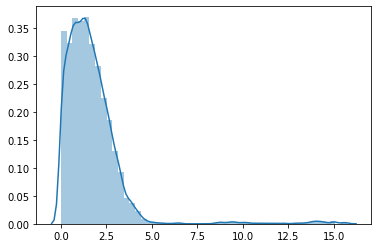

In [11]:
sns.distplot(list_dist)

Random pairs of indices:

In [12]:
import random

In [13]:
num_iter = 10000
list_dist_rand = []
for i in range(num_iter):
    rvid_pair = random.sample(list_rv_id, 2)
    list_dist_rand.append(umap_distance( rvid_pair[0], rvid_pair[1], df_umap))

Text(0.5, 0, 'umap euclidean distance')

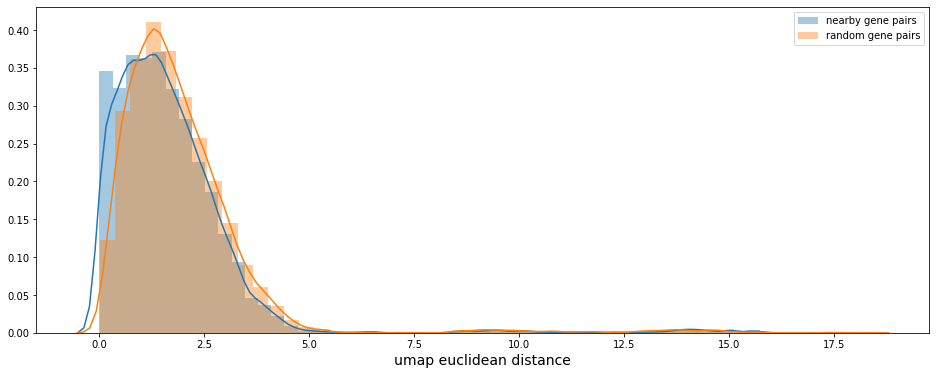

In [18]:
plt.figure(figsize = (16,6))
sns.distplot(list_dist)
sns.distplot(list_dist_rand)
plt.legend(['nearby gene pairs', 'random gene pairs'])
plt.xlabel('umap euclidean distance', fontsize = 14)
